In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from sklearn.datasets import fetch_openml

# load the MNIST dataset
mnist_data = fetch_openml('mnist_784')

In [4]:
print(mnist_data['data'].shape)
print(mnist_data['target'].shape)

X = mnist_data['data']
y = mnist_data['target']

(70000, 784)
(70000,)


In [5]:
from sklearn.model_selection import train_test_split

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


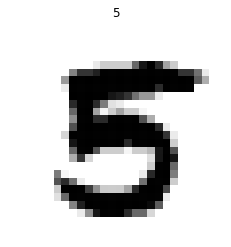

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

index = 2

# plot an example
def plot_example(X, y):
    plt.imshow(X.reshape(28, 28), cmap='binary')
    plt.axis(False)
    plt.title(f"{y}")

plot_example(X_train[index], y_train[index])
plt.show()

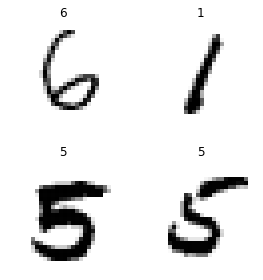

In [7]:
# plot a few examples
fig = plt.figure(figsize=(4, 4))

for i in range(4):
    fig.add_subplot(2, 2, i+1)
    plot_example(X_train[i], y_train[i])

fig.tight_layout()
plt.show()

In [8]:
import numpy as np

def one_hot_encode(x, num_classes=10):
    x_one_hot = x.astype(int).reshape(-1)
    x_one_hot = np.eye(num_classes)[x_one_hot]
    return x_one_hot

# one-hot encode labels
y_train_one_hot = one_hot_encode(y_train)
y_test_one_hot = one_hot_encode(y_test)

In [9]:
# normalize the inputs
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

In [126]:
from models import Sequential
from layers import Dense

# create the model
model = Sequential([
    Dense(16, input_shape=(784,), activation="relu"),
#     Dense(16, activation="relu"),
    Dense(10, activation="softmax")
])

In [127]:
# prepare the model for training
model.compile(loss="categorical_crossentropy",
              learning_rate=0.1,
              metrics=['categorical_accuracy'])

print(model.evaluate(X_train_normalized, y_train_one_hot))

loss=2.3024	accuracy=0.0979
(2.302369439280033, [0.09793333333333333])


In [128]:
np.seterr(all='raise')

# train the model
history = model.fit(X_train_normalized, y_train_one_hot, epochs=40)

Epoch 1:	loss=2.3022	accuracy=0.0979
Epoch 2:	loss=2.3021	accuracy=0.0979
Epoch 3:	loss=2.3019	accuracy=0.0979
Epoch 4:	loss=2.3018	accuracy=0.0979
Epoch 5:	loss=2.3016	accuracy=0.0979
Epoch 6:	loss=2.3014	accuracy=0.0979
Epoch 7:	loss=2.3012	accuracy=0.0979
Epoch 8:	loss=2.3010	accuracy=0.0979
Epoch 9:	loss=2.3008	accuracy=0.0979
Epoch 10:	loss=2.3006	accuracy=0.0979
Epoch 11:	loss=2.3003	accuracy=0.0979
Epoch 12:	loss=2.3001	accuracy=0.0979
Epoch 13:	loss=2.2998	accuracy=0.0979
Epoch 14:	loss=2.2994	accuracy=0.0979
Epoch 15:	loss=2.2990	accuracy=0.0979
Epoch 16:	loss=2.2986	accuracy=0.0979
Epoch 17:	loss=2.2980	accuracy=0.0979
Epoch 18:	loss=2.2974	accuracy=0.0979
Epoch 19:	loss=2.2965	accuracy=0.0979
Epoch 20:	loss=2.2956	accuracy=0.0979
Epoch 21:	loss=2.2944	accuracy=0.0979
Epoch 22:	loss=2.2932	accuracy=0.0979
Epoch 23:	loss=2.2922	accuracy=0.0979
Epoch 24:	loss=2.2919	accuracy=0.0979
Epoch 25:	loss=2.2934	accuracy=0.0979
Epoch 26:	loss=2.2985	accuracy=0.0979
Epoch 27:	loss=2.3103

In [13]:
history[39]['parameters'][1]["weights"].sum()

96.70216723215762

In [ ]:
model.layers[0].call(X_train)

In [15]:
import torch

In [109]:
torch.random.manual_seed(42)
np.random.seed(42)

x = torch.randn(2, 2)
print(x)

my_dense = Dense(1, input_shape=x.shape[1:])
my_dense.build(my_dense.input_shape)
print("My Dense Layer:")
print("Weights:")
print(my_dense.weights)
print()
print("Biases:")
print(my_dense.biases)
print()
print("Activations:")
print(my_dense(x.numpy()))
print()
print()

torch_dense = torch.nn.Linear(x.shape[1], 1)
with torch.no_grad():
    torch_dense.weight = torch.nn.Parameter(torch.tensor(my_dense.weights.T, dtype=torch.float))
    torch_dense.bias = torch.nn.Parameter(torch.tensor(my_dense.biases, dtype=torch.float))

    print("Torch Dense Layer:")
    print("Weights:")
    print(torch_dense.weight.numpy())
    print()
    print("Biases:")
    print(torch_dense.bias.numpy())
    print()
    print("Activations:")
    print(torch_dense(x).numpy())

tensor([[0.3367, 0.1288],
        [0.2345, 0.2303]])
My Dense Layer:
Weights:
[[ 0.00496714]
 [-0.00138264]]

Biases:
[[0.]]

Activations:
[[0.00149429]
 [0.00084614]]


Torch Dense Layer:
Weights:
[[ 0.00496714 -0.00138264]]

Biases:
[[0.]]

Activations:
[[0.00149429]
 [0.00084614]]


In [130]:
torch.random.manual_seed(42)
np.random.seed(42)

# x = torch.randn(2, 2)
x = torch.tensor([[100, 200],
                  [400, 1000000]], dtype=torch.float)
print(x)

my_dense = Dense(3, input_shape=x.shape[1:], activation="softmax")
my_dense.build(my_dense.input_shape)
my_dense.weights *= 100
print("My Dense Layer:")
print("Weights:")
print(my_dense.weights)
print()
print("Biases:")
print(my_dense.biases)
print()
print("Activations:")
# print(my_dense(x.numpy()))
print()
print()

torch_dense = torch.nn.Linear(x.shape[1], 1)
torch_softmax = torch.nn.Softmax(dim=1)

with torch.no_grad():
    torch_dense.weight = torch.nn.Parameter(torch.tensor(my_dense.weights.T, dtype=torch.float))
    torch_dense.bias = torch.nn.Parameter(torch.tensor(my_dense.biases, dtype=torch.float))

    print("Torch Dense Layer:")
    print("Weights:")
    print(torch_dense.weight.numpy())
    print()
    print("Biases:")
    print(torch_dense.bias.numpy())
    print()
    print("Linear Output:")
    print(torch_dense(x).numpy())
    print()
    print("Activations:")
    print(torch_softmax(torch_dense(x)).numpy())

tensor([[1.0000e+02, 2.0000e+02],
        [4.0000e+02, 1.0000e+06]])
My Dense Layer:
Weights:
[[ 0.49671415 -0.1382643   0.64768854]
 [ 1.52302986 -0.23415337 -0.23413696]]

Biases:
[[0. 0. 0.]]

Activations:


Torch Dense Layer:
Weights:
[[ 0.49671414  1.5230298 ]
 [-0.1382643  -0.23415338]
 [ 0.64768857 -0.23413695]]

Biases:
[[0. 0. 0.]]

Linear Output:
[[ 3.5427737e+02 -6.0657104e+01  1.7941467e+01]
 [ 1.5232284e+06 -2.3420869e+05 -2.3387788e+05]]

Activations:
[[1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
help(torch.tensor([[2, 4]], dtype=torch.float).softmax)

In [153]:
from activations import Softmax
import scipy.special

softmax = Softmax()
x = np.array([[1, 2, 3],
              [1000, 100, 10],
              [12345, 67890, 999999999]])

np.seterr(all='warn')
# print(softmax(x))
scipy.special.softmax(x, axis=-1)

/home/moaz/.local/lib/python3.7/site-packages/scipy/special/_logsumexp.py:112: RuntimeWarning: underflow encountered in exp
  tmp = np.exp(a - a_max)
/home/moaz/.local/lib/python3.7/site-packages/scipy/special/_logsumexp.py:215: RuntimeWarning: underflow encountered in exp
  return np.exp(x - logsumexp(x, axis=axis, keepdims=True))


array([[0.09003057, 0.24472847, 0.66524096],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ]])